# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from itertools import product
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook
import sys
np.set_printoptions(threshold=sys.maxsize)
import csv
from itertools import product
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# ARIMAX MODEL

# Importing and Cleaning Data

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

df = pd.read_excel('pedridataset.xlsx')
df['Distance_Covered'] = df.apply(lambda row: 0 if row['Minutes_Played'] == 0 else row['Distance_Covered'], axis=1)
df.head()

,Date,Week,Minutes_Played,Number_of_Games,Distance_Covered,Injury_Status
0,2019-08-19,1,82,1,10.23,0
1,2019-08-26,2,70,1,9.85,0
2,2019-09-02,3,90,1,11.96,0
3,2019-09-09,4,85,1,11.06,0
4,2019-09-16,5,0,0,0.00,0


## 1. Plotting the Data

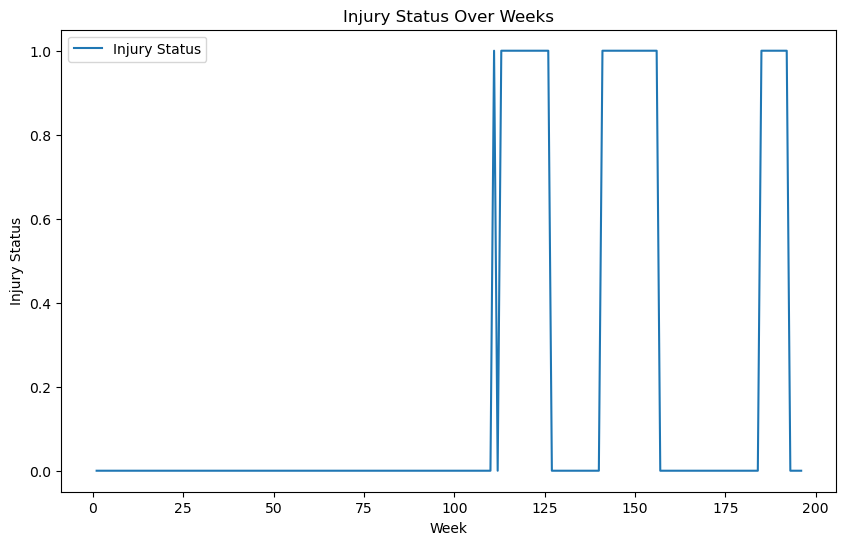

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['Week'], df['Injury_Status'], label='Injury Status')
plt.title('Injury Status Over Weeks')
plt.xlabel('Week')
plt.ylabel('Injury Status')
plt.legend()
plt.show()

## 2. Removing the Trend and Checking for Stationarity

In [4]:
result = adfuller(df['Injury_Status'][1:])

print('Injury_Status_diff')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


Injury_Status_diff
ADF Statistic: -2.766125434336269
p-value: 0.0632777931773202


In [5]:
df['Injury_Diff'] = df['Injury_Status'].diff().dropna()
result = adfuller(df['Injury_Diff'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.642535644920769
p-value: 1.0286841627037456e-06


## 3. Plotting ACF and PACF

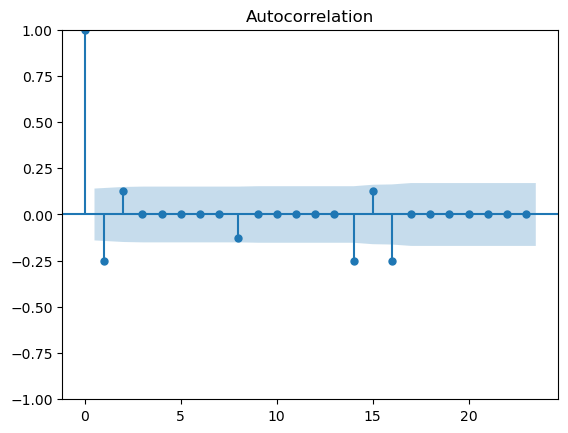

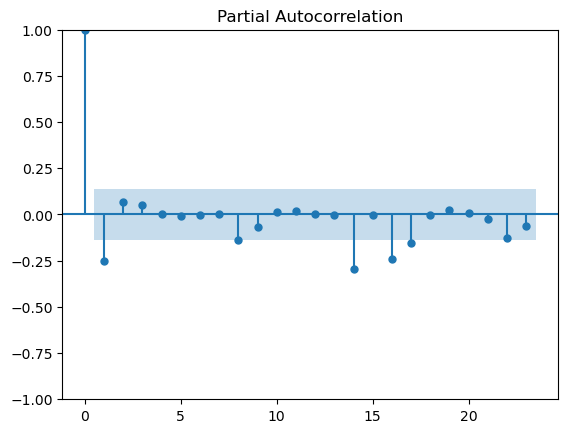

In [67]:
plot_acf(df['Injury_Diff'].dropna())
plt.show()
plot_pacf(df['Injury_Diff'].dropna())
plt.show()

## 4. Fitting the ARIMAX Model and Checking Residuals

In [11]:
ps = range(0, 15, 1)
d = 1
qs = range(0, 7, 1)

 

parameters = product(ps, qs)
parameters_list = list(parameters)

 

order_list = []

 

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)

 

order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2)]

In [12]:
def optimize_ARIMA(data, order_list):

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(data, order=order, simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df
result_df = optimize_ARIMA(df['Injury_Status'], order_list)

result_df

  0%|          | 0/105 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(8, 1, 6)",-85.734557
1,"(8, 1, 5)",-85.303322
2,"(14, 1, 2)",-84.987173
3,"(9, 1, 6)",-84.276913
4,"(14, 1, 3)",-84.042637
...,...,...
100,"(12, 1, 2)",-63.406398
101,"(12, 1, 0)",-62.329318
102,"(11, 1, 1)",-62.326826
103,"(13, 1, 0)",-60.330488


In [16]:
exog_vars = df[['Minutes_Played', 'Distance_Covered','Number_of_Games']]
model_arimax = SARIMAX(df['Injury_Status'], order=(8, 1, 6), seasonal_order=(0, 0, 0, 0), exog=exog_vars,simple_differencing=False)
model_arimax_fitted = model_arimax.fit(disp=False)
print(model_arimax_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:          Injury_Status   No. Observations:                  196
Model:               SARIMAX(8, 1, 6)   Log Likelihood                  54.340
Date:                Sun, 22 Oct 2023   AIC                            -72.680
Time:                        09:13:55   BIC                            -13.766
Sample:                             0   HQIC                           -48.826
                                - 196                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Minutes_Played       0.0055      0.005      1.135      0.257      -0.004       0.015
Distance_Covered    -0.0395      0.040     -0.986      0.324      -0.118       0.039
Number_of_Games     -0.1232 

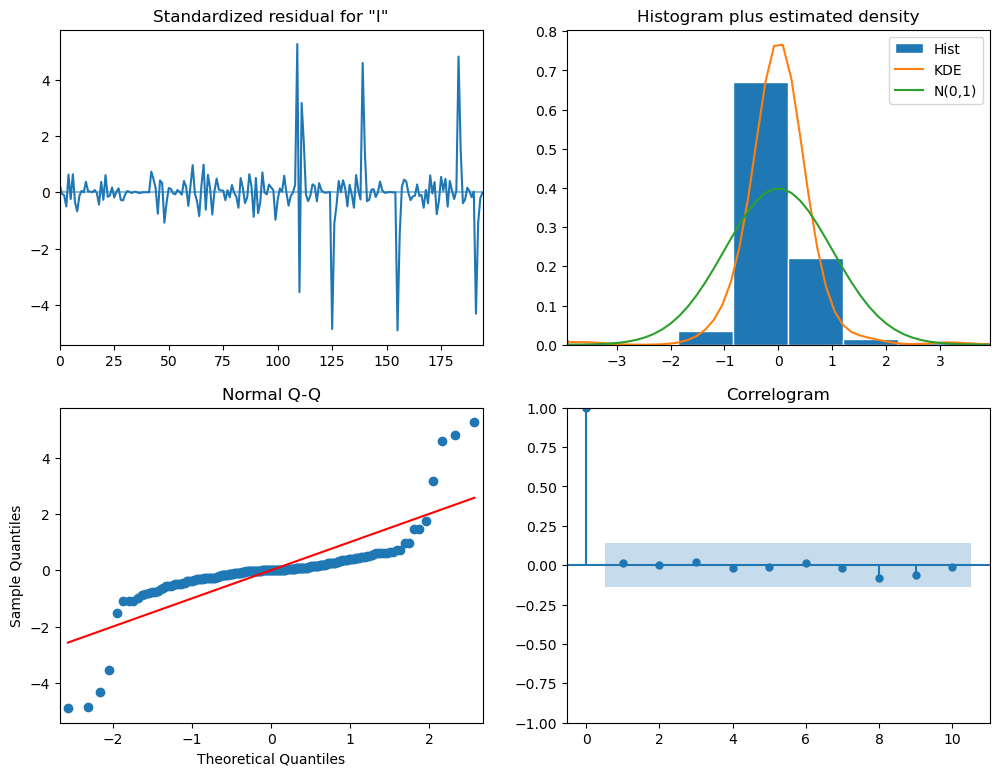

In [17]:
model_arimax_fitted.plot_diagnostics(figsize=(12,9));

## 5. Making Forecasts

In [18]:
forecast = model_arimax_fitted.get_forecast(steps=10, exog=exog_vars.iloc[-10:])
forecast_conf_int = forecast.conf_int()
forecast_values = forecast.predicted_mean

# Forecasting Future Values

In [19]:
forecast_steps = 100
exog_future = pd.DataFrame(np.random.randn(forecast_steps, 3), columns=['Minutes_Played', 'Distance_Covered','Number_of_Games'])
forecast_results = model_arimax_fitted.get_forecast(steps=forecast_steps, exog=exog_future)
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Visualizing the Forecasts

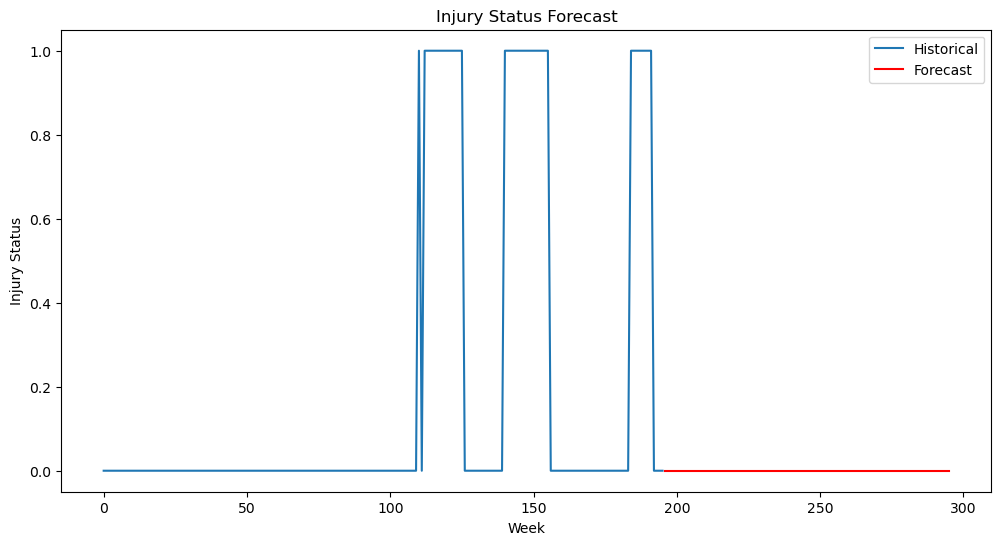

In [20]:
binary_forecast_values = forecast_values.round()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Injury_Status'], label='Historical')
plt.plot(np.arange(len(df), len(df)+forecast_steps), binary_forecast_values, color='red', label='Forecast')
plt.title('Injury Status Forecast')
plt.xlabel('Week')
plt.ylabel('Injury Status')
plt.legend()
plt.show()


# SARIMAX

## 4. Fitting the ARIMAX Model and Checking Residuals

In [13]:
p = range(0, 6, 1)
d = 1
q = range(0, 6, 1)
P = range(0, 6, 1)
D = 1
Q = range(0, 6, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

print(len(parameters_list))
print(parameters_list[:5])

1296
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 0, 4)]


In [14]:
def optimize_SARIMA(data, parameters_list, d, D, s):
    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(data, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [15]:
result_df = optimize_SARIMA(df['Injury_Status'], parameters_list, 1, 1, 7)
result_df

  0%|          | 0/1296 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 0, 0, 3)",-60.236762
1,"(0, 1, 0, 3)",-58.835977
2,"(0, 2, 0, 3)",-58.439230
3,"(1, 0, 1, 3)",-58.289510
4,"(1, 0, 0, 4)",-58.275560
...,...,...
1291,"(3, 1, 0, 0)",58.393558
1292,"(5, 0, 0, 0)",59.035893
1293,"(1, 4, 0, 0)",60.170793
1294,"(0, 0, 0, 0)",60.183237


In [6]:
exog_vars = df[['Minutes_Played', 'Distance_Covered','Number_of_Games']]
model_arimax = SARIMAX(df['Injury_Status'], order=(8, 1, 6), seasonal_order=(1, 0, 0, 9), exog=exog_vars,simple_differencing=False)
model_arimax_fitted = model_arimax.fit(disp=False)
print(model_arimax_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Injury_Status   No. Observations:                  196
Model:             SARIMAX(8, 1, 6)x(1, 0, [], 9)   Log Likelihood                  56.085
Date:                            Sun, 22 Oct 2023   AIC                            -74.171
Time:                                    13:44:31   BIC                            -11.984
Sample:                                         0   HQIC                           -48.992
                                            - 196                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Minutes_Played       0.0060      0.005      1.193      0.233      -0.004       0.016
Distance_Covered 

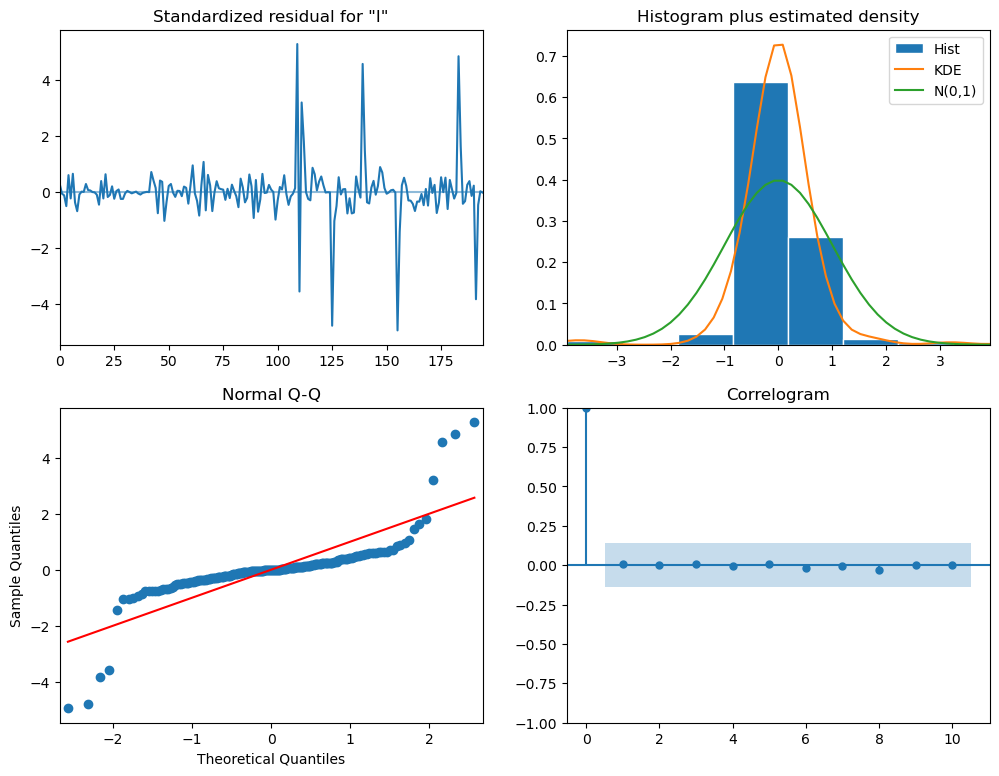

In [7]:
model_arimax_fitted.plot_diagnostics(figsize=(12,9));

## 5. Making Forecasts

In [8]:
forecast = model_arimax_fitted.get_forecast(steps=10, exog=exog_vars.iloc[-10:])
forecast_conf_int = forecast.conf_int()
forecast_values = forecast.predicted_mean

# Forecasting Future Values

In [9]:

forecast_steps = 100

exog_future = pd.DataFrame(np.random.randn(forecast_steps, 3), columns=['Minutes_Played', 'Distance_Covered','Number_of_Games'])

forecast_results = model_arimax_fitted.get_forecast(steps=forecast_steps, exog=exog_future)
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Visualizing the Forecasts

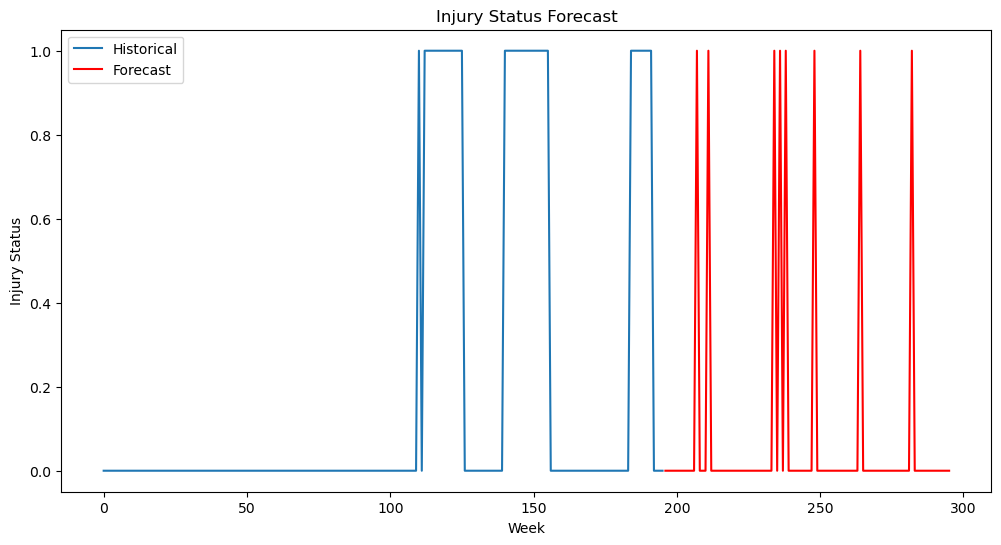

In [10]:
binary_forecast_values = forecast_values.round()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Injury_Status'], label='Historical')
plt.plot(np.arange(len(df), len(df)+forecast_steps), binary_forecast_values, color='red', label='Forecast')
plt.title('Injury Status Forecast')
plt.xlabel('Week')
plt.ylabel('Injury Status')
plt.legend()
plt.show()


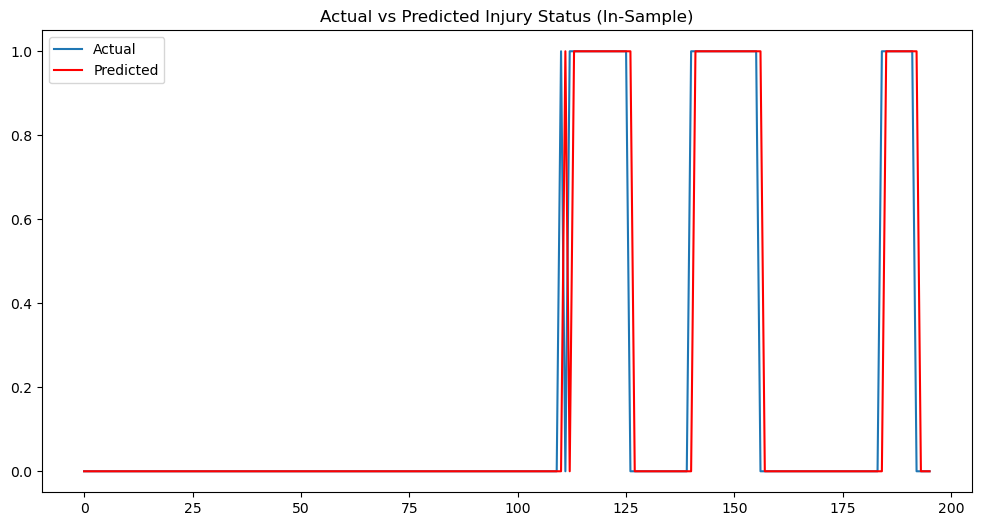

In [13]:

in_sample_preds = model_arimax_fitted.get_prediction(start=0, end=len(df)-1).predicted_mean
binary_in_sample_preds = np.round(in_sample_preds)  # Round the predictions to get binary values

plt.figure(figsize=(12, 6))
plt.plot(df['Injury_Status'], label='Actual')
plt.plot(binary_in_sample_preds, label='Predicted', color='red')
plt.title('Actual vs Predicted Injury Status (In-Sample)')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(df['Injury_Status'], binary_in_sample_preds)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(df['Injury_Status'], binary_in_sample_preds)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[153   4]
 [  4  35]]
Accuracy: 0.96


# VAR model


# Importing and Cleaning Data

In [16]:
data = pd.read_excel('pedridataset.xlsx')
data.set_index('Date', inplace=True)
data1 = pd.read_excel('pedridataset.xlsx')
data1.set_index('Date', inplace=True)

In [17]:

data['Injury_Status_diff'] = data['Injury_Status'].diff().dropna()

## Fitting the VAR Model and Checking Residuals

In [159]:
def optimize_VAR(data, max_lags=10):

    model = VAR(data)
    best_aic = np.inf
    best_lag_order = 0
    
   
    for i in range(1, max_lags+1):
        try:
            result = model.fit(i)
            print(f"Lag Order = {i}, AIC = {result.aic}")
            if result.aic < best_aic:
                best_aic = result.aic
                best_lag_order = i
        except:
            print(f"Could not fit the model for lag order = {i}")
            continue
    
    return best_lag_order


optimal_lag_order = optimize_VAR(endog, max_lags=10)
print(f"Best Lag Order based on AIC: {optimal_lag_order}")

Lag Order = 1, AIC = -59.7540917265261
Lag Order = 2, AIC = -58.13716932631111
Lag Order = 3, AIC = -59.74073473127624
Lag Order = 4, AIC = -60.32915075417986
Lag Order = 5, AIC = -59.59060654432299
Lag Order = 6, AIC = -56.68817179301309
Lag Order = 7, AIC = -59.10428857269114
Lag Order = 8, AIC = -54.441877713005205
Lag Order = 9, AIC = -56.342307870360706
Lag Order = 10, AIC = -57.37466893437417
Best Lag Order based on AIC: 4


In [18]:
model = VAR(data[['Week', 'Minutes_Played', 'Number_of_Games', 'Distance_Covered', 'Injury_Status_diff']].dropna())
var_model_fitted = model.fit(4)


# Forecasting Values

In [19]:
forecast_values = var_model_fitted.forecast(data[['Week', 'Minutes_Played', 'Number_of_Games', 'Distance_Covered', 'Injury_Status_diff']].dropna().values[-4:], steps=50)
forecast_df = pd.DataFrame(forecast_values, columns=['Week', 'Minutes_Played', 'Number_of_Games', 'Distance_Covered', 'Injury_Status_diff'])
forecast_df['Injury_Status_forecast'] = np.r_[data['Injury_Status'][-1], forecast_df['Injury_Status_diff'].cumsum()[:-1]] + forecast_df['Injury_Status_diff']
median_forecast = forecast_df['Injury_Status_forecast'].median()
forecast_df['Injury_Status_binary'] = (forecast_df['Injury_Status_forecast'] > median_forecast).astype(int)

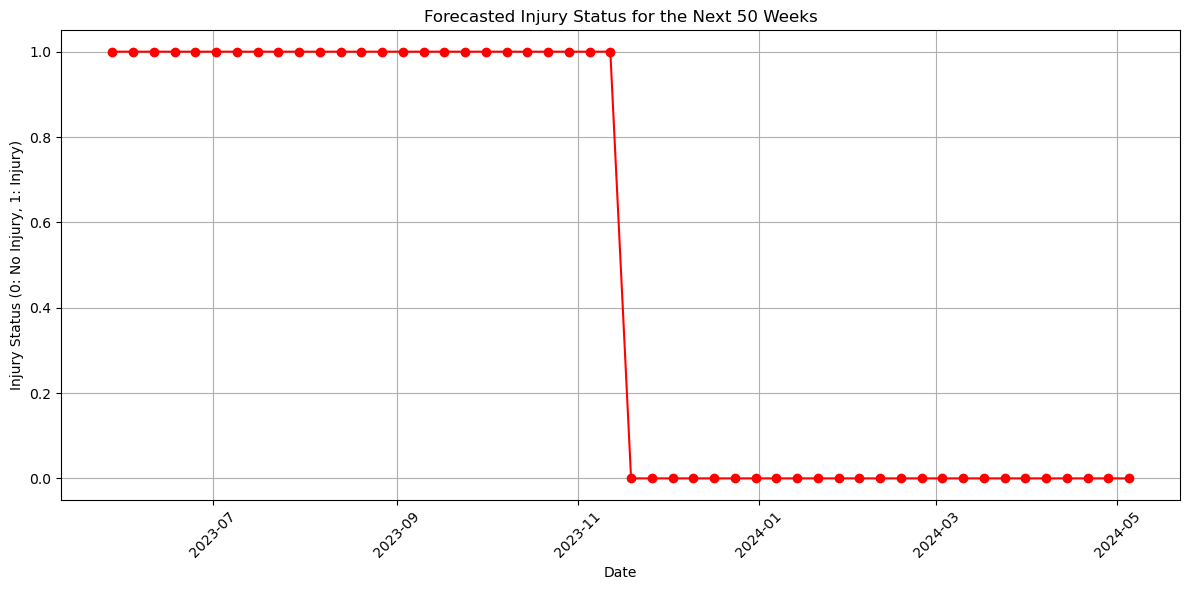

In [20]:
forecast_index = pd.date_range(start=data.index[-1], periods=51, freq='W')[1:]
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecast_df['Injury_Status_binary'], marker='o', linestyle='-', color='red')
plt.title('Forecasted Injury Status for the Next 50 Weeks')
plt.xlabel('Date')
plt.ylabel('Injury Status (0: No Injury, 1: Injury)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Checking Accuracy of Model

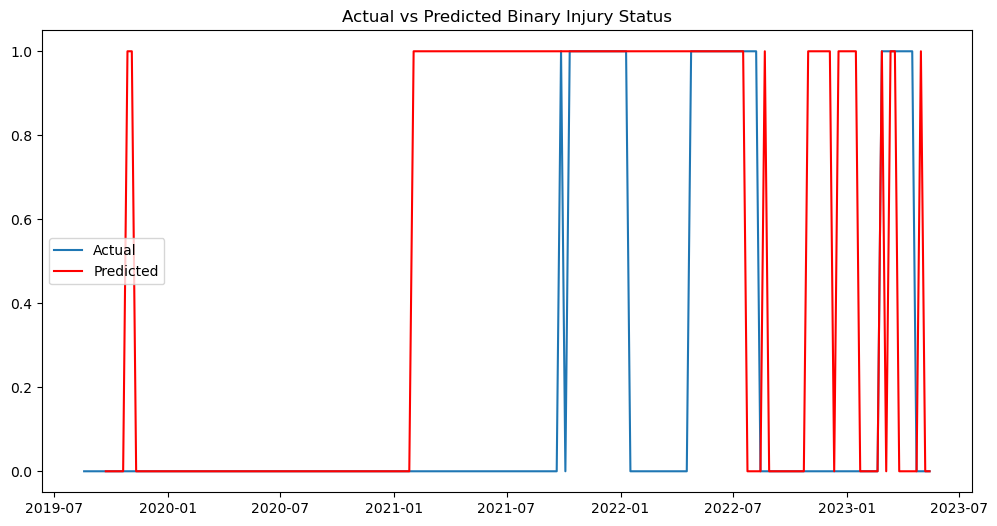

In [21]:
import matplotlib.pyplot as plt

in_sample_preds_diff = var_model_fitted.fittedvalues['Injury_Status_diff']

in_sample_preds_cumsum = in_sample_preds_diff.cumsum() + data['Injury_Status'].iloc[var_model_fitted.k_ar - 1]

median_cumsum = in_sample_preds_cumsum.median()
in_sample_preds_binary = (in_sample_preds_cumsum > median_cumsum).astype(int)

in_sample_preds_binary.index = data.index[var_model_fitted.k_ar+1:]

plt.figure(figsize=(12, 6))
plt.plot(data['Injury_Status'], label='Actual')
plt.plot(in_sample_preds_binary, label='Predicted', color='red')
plt.title('Actual vs Predicted Binary Injury Status')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
true_labels = data['Injury_Status'].iloc[var_model_fitted.k_ar:].values
true_labels = true_labels[:len(in_sample_preds_binary)]
print(len(true_labels), len(in_sample_preds_binary))
conf_matrix = confusion_matrix(true_labels, in_sample_preds_binary)
print("Confusion Matrix:")
print(conf_matrix)
accuracy = accuracy_score(true_labels, in_sample_preds_binary)
print(f"Accuracy: {accuracy:.2f}")



191 191
Confusion Matrix:
[[86 66]
 [10 29]]
Accuracy: 0.60
